Load Packages

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import jun_function as jf

Data Cleaning

In [10]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [12]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_test [15 15 15]


In [13]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Perceptron

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [7]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [8]:
y_pred = ppn.predict(X_test_std)
print(f'Misclassified examples: {(y_test != y_pred).sum()}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

print(f'Accuracy: {ppn.score(X_test_std, y_test):.3f}')

Misclassified examples: 1
Accuracy: 0.978
Accuracy: 0.978


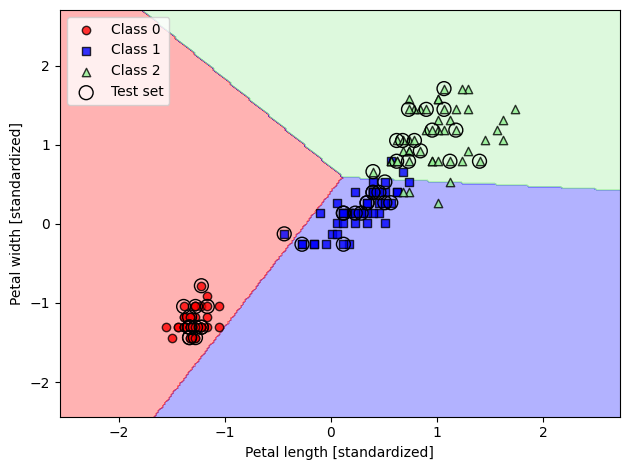

In [9]:
# X_combined_std = np.vstack((X_train_std, X_test_std))
# y_combined = np.hstack((y_train, y_test))
jf.plot_decision_regions(X=X_combined_std, 
                         y=y_combined, 
                         classifier=ppn, 
                         test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

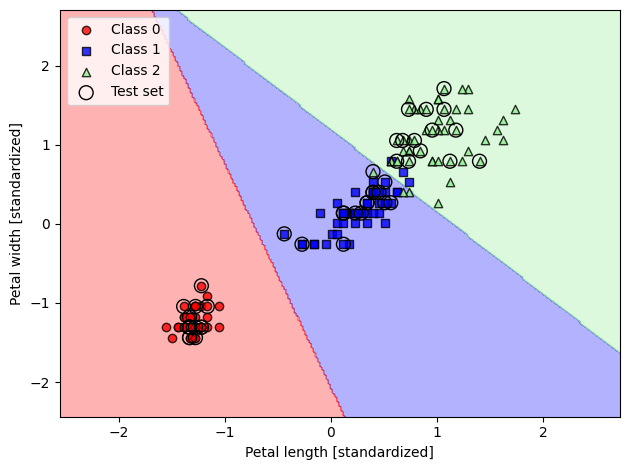

In [13]:
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
jf.plot_decision_regions(X_combined_std, 
                        y_combined,
                        classifier=lr,
                        test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [15]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [17]:
# lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [24]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [2]:
from sklearn.svm import SVC

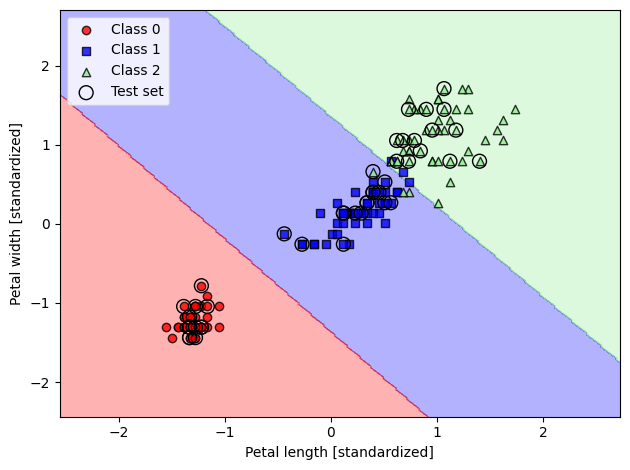

In [11]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
jf.plot_decision_regions(X_combined_std, 
                        y_combined,
                        classifier=svm,
                        test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

SGD

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [6]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0]>0, X_xor[:, 1]>0)
y_xor = np.where(y_xor, 1, 0)

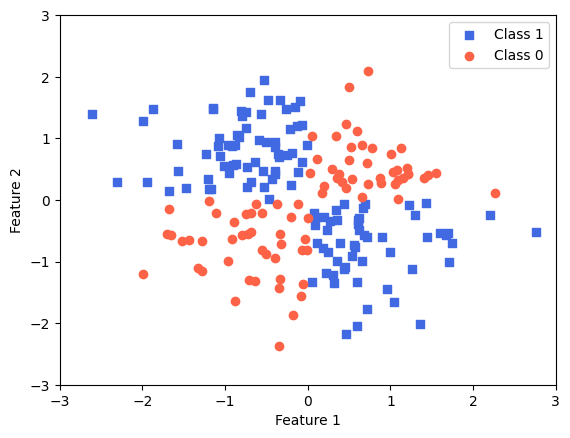

In [16]:
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
            c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1],
            c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

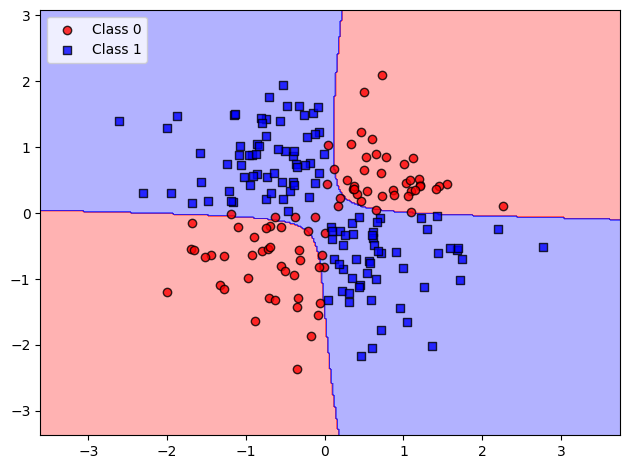

In [21]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
jf.plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

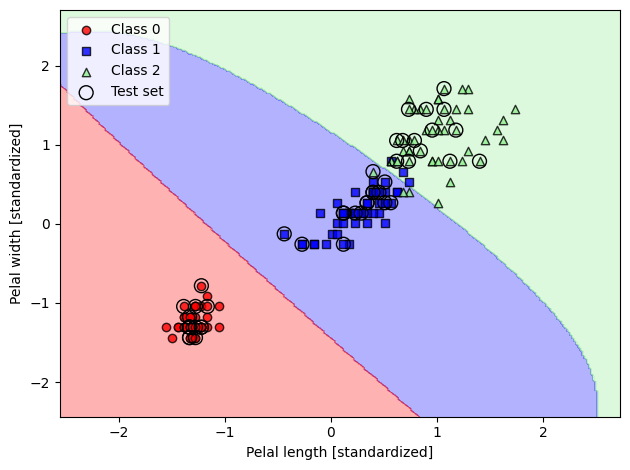

In [27]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
jf.plot_decision_regions(X_combined_std, y_combined,
                         classifier=svm, test_idx=range(105, 150))
plt.xlabel('Pelal length [standardized]')
plt.ylabel('Pelal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

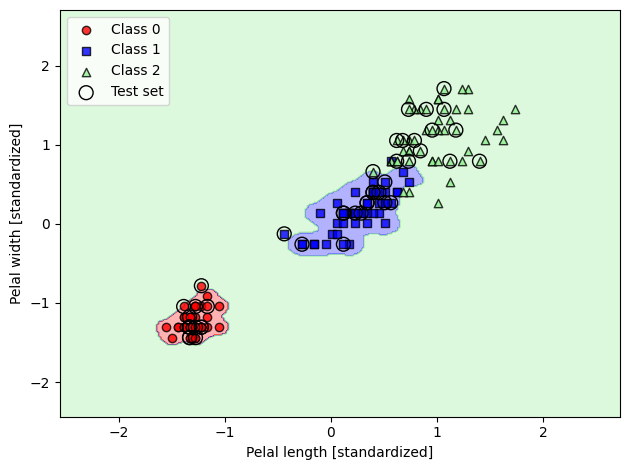

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
jf.plot_decision_regions(X_combined_std, y_combined,
                         classifier=svm, test_idx=range(105, 150))
plt.xlabel('Pelal length [standardized]')
plt.ylabel('Pelal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

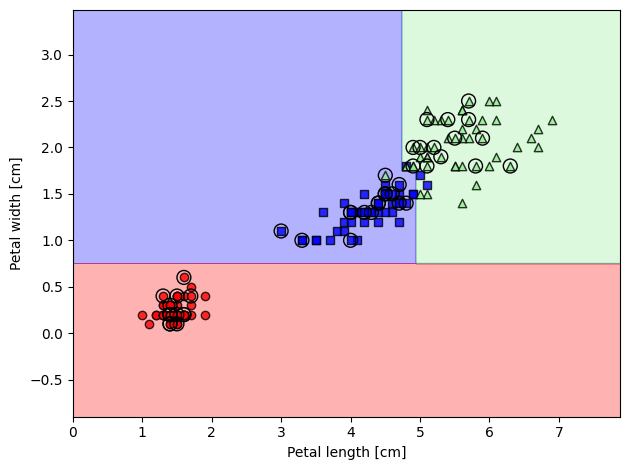

In [31]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
jf.plot_decision_regions(X_combined, y_combined,
                         classifier=tree_model,
                         test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.tight_layout()
plt.show()

In [32]:
from sklearn import tree

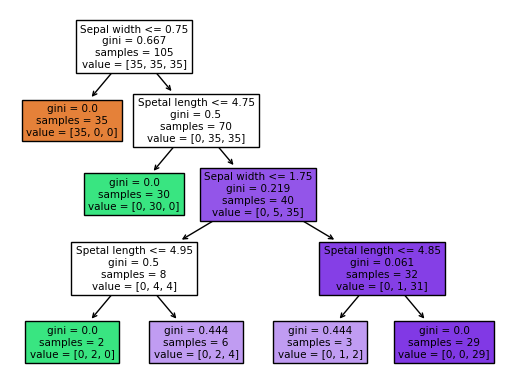

In [33]:
feature_names = ['Spetal length', 'Sepal width', 
                'Petal length', 'Petal width']
tree.plot_tree(tree_model,
                feature_names=feature_names,
                filled=True)
plt.show()

# Random Forest            

In [8]:
from sklearn.ensemble import RandomForestClassifier

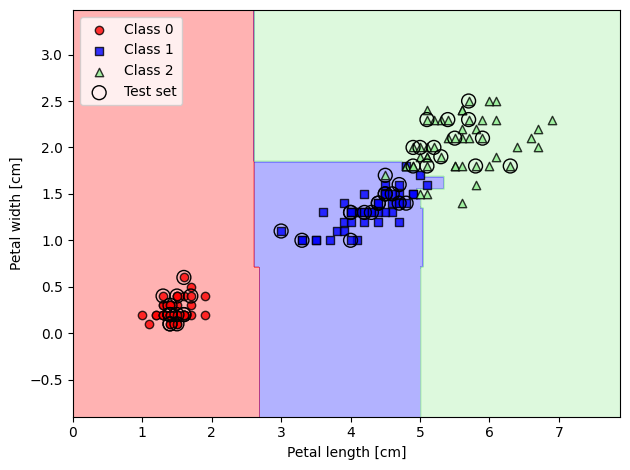

In [15]:
forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
jf.plot_decision_regions(X_combined, y_combined,
                         classifier=forest, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

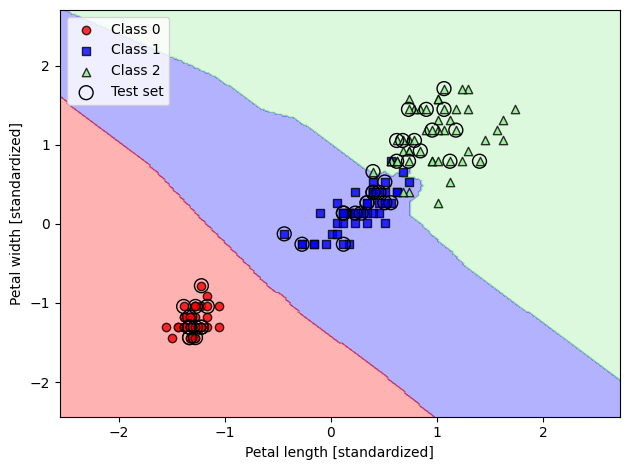

In [20]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)

jf.plot_decision_regions(X_combined_std, y_combined,
                         classifier=knn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')    
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()